In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
%config Completer.use_jedi = False
from sklearn.metrics import classification_report
from kneed import DataGenerator, KneeLocator
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA, FastICA as ICA
from scipy import sparse
from sklearn import decomposition
from sklearn import random_projection
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
random_seed = 2

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

digits = load_digits()
X, y = digits.data, digits.target
#StratifiedShuffleSplit(n_splits = 1,test_size=0.2, train_size = 0.8, random_state = 1)
def plot_validation_curve_nn(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None,
                             cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "balanced_accuracy", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.plot(param_range, train_scores_mean, label="Training score", color="r")

    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")

    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = sorted(zip(param_range, test_scores_mean), key = lambda x:x[1], reverse = True)
    return array

In [ ]:
data_b = pd.read_csv("BreastCancer.csv", index_col="id")
data_b["label"] = 0
#label
data_b.label[data_b.diagnosis == 'B'] = 0
data_b.label[data_b.diagnosis == 'M'] = 1
data_b = data_b.drop(columns=['Unnamed: 32', 'diagnosis'])
data_b.head()
#Split
X_b_pre_scale = data_b.iloc[:,:-1]
y_b = data_b['label']

X_train, X_test, y_train, y_test = train_test_split(X_b_pre_scale, y_b, test_size=0.2, stratify = y_b, random_state = 1)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )
#Scale
scaler = preprocessing.StandardScaler().fit(X_train)
X_b = scaler.transform(X_train)
X_b_test = scaler.transform(X_test)
y_b = y_train
y_b_test = y_test

print(len(X_b), len(y_b),' samples in scaled training data\n',
      len(X_b_test), len(y_b_test),' samples in scaled test data\n', )


In [ ]:
data_red = pd.read_csv("winequality-red.csv", delimiter = ";")
data_red["isRed"] = 1
data_red["isWhite"] = 0
data_white = pd.read_csv("winequality-white.csv", delimiter = ";")
data_white["isRed"] = 0
data_white["isWhite"] = 1
data_w = pd.concat([data_red, data_white], axis = 0)

data_w["label"] = data_w["quality"]
data_w = data_w[data_w.quality != 6]
data_w.label[data_w.quality == 3] = 0
data_w.label[data_w.quality == 4] = 0
data_w.label[data_w.quality == 5] = 0
data_w.label[data_w.quality == 7] = 1
data_w.label[data_w.quality == 8] = 1
data_w.label[data_w.quality == 9] = 1
print(data_w.groupby('quality').size())
data_w = data_w.drop(columns =["quality"])

X_w_pre_scale = data_w.iloc[:,:-1]
y_w = data_w['label']

X_train, X_test, y_train, y_test = \
    train_test_split(X_w_pre_scale, y_w,
                     test_size=0.2, stratify = y_w, random_state = 1)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )
scaler = preprocessing.StandardScaler().fit(X_train)
X_w = scaler.transform(X_train)
X_w_test = scaler.transform(X_test)
y_w = y_train
y_w_test = y_test
print(len(X_w), len(y_w),' samples in scaled training data\n',
      len(X_w_test), len(y_w_test),' samples in scaled test data\n', )


In [ ]:
pd.DataFrame(X_w).describe()

In [ ]:
from sklearn.decomposition import PCA, FastICA as ICA
from scipy import sparse
from sklearn import decomposition
from sklearn import random_projection
from sklearn.metrics import mean_squared_error as MSE

#PCA
bc_pca_n = 6
pca_bc = PCA(n_components = bc_pca_n)
X_b_pca = pca_bc.fit_transform(X_b)

wine_pca_n = 6
pca_wine = PCA(n_components = wine_pca_n)
X_w_pca = pca_wine.fit_transform(X_w)
X_w_pca_test = pca_wine.transform(X_w_test)


#ICA
ica_b = ICA(random_state=2, n_components = 26)
X_b_ICA = ica_b.fit_transform(X_b)
df_b_ICA = pd.DataFrame(X_b_ICA)
selected_IC_b = [16, 7, 23, 12, 8, 9, 6,15,24,10,2]
X_b_ICA_original = X_b_ICA
X_b_ICA = df_b_ICA[selected_IC_b].to_numpy()


ica_w = ICA(random_state=2, n_components = 8)
selected_IC_w = [3,1,0,7]
X_w_ICA = ica_w.fit_transform(X_w)
df_w_ICA = pd.DataFrame(X_w_ICA)
X_w_ICA_original = X_w_ICA
X_w_ICA = df_w_ICA[selected_IC_w].to_numpy()

#RP
rp_b = random_projection.GaussianRandomProjection(random_state=2, n_components = 22)
X_b_rp = rp_b.fit_transform(X_b)

rp_w = random_projection.GaussianRandomProjection(random_state=2, n_components = 10)
X_w_rp = rp_w.fit_transform(X_w)
X_w_rp_test = rp_w.transform(X_w_test)

#FI
selected_FI_b = ["perimeter_worst", "concave points_worst", "texture_worst", "radius_worst",
                "area_se"]
df_b_FI = pd.DataFrame(X_b, columns = X_b_pre_scale.columns)
X_b_FI = df_b_FI[selected_FI_b].to_numpy()

selected_FI_w = ["alcohol", "volatile acidity", "residual sugar", "sulphates",
                "total sulfur dioxide", "free sulfur dioxide","fixed acidity", "chlorides"]

df_w_FI = pd.DataFrame(X_w, columns = X_w_pre_scale.columns)
X_w_FI = df_w_FI[selected_FI_w].to_numpy()
df_w_FI_test = pd.DataFrame(X_w_test, columns = X_w_pre_scale.columns)
X_w_FI_test = df_w_FI_test[selected_FI_w].to_numpy()



# Neural Networks + Clustering

In [ ]:

original_nn = MLPClassifier( alpha = 0.886, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=275, random_state =1, solver = 'sgd'
                          , momentum = 0.978947)
original_nn.fit(X_b, y_b)
prediction=original_nn.predict(X_b_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.f1_score(prediction,y_b_test)))
print(classification_report(prediction,y_b_test))
plot_learning_curve(original_nn, X_b, y_b, "NN")

## NN - Breast Cancer - Kmeans

In [ ]:
#Breast Cancer
n_clusters =2 
km_b = KMeans(n_clusters=n_clusters, random_state = random_seed)
km_b = km_b.fit(X_b)
cluster_b_kmeans = km_b.predict(X_b)
cluster_b_kmeans_test = km_b.predict(X_b_test)
#cluster = np.array([cluster])

X_b_cluster_kmeans= np.concatenate((X_b, cluster_b_kmeans[:,None]), axis=1)
X_b_cluster_kmeans_test= np.concatenate((X_b_test, cluster_b_kmeans_test[:,None]), axis=1)

# test = pd.DataFrame(X_b_cluster)
# test[[30]].hist()

/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  warnings.warn(


The balanced accuracy of the Decision Tree is 0.976
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Train Score Mean 0.982904991997265
Test Score Mean 0.9582651482197232


<module 'matplotlib.pyplot' from '/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

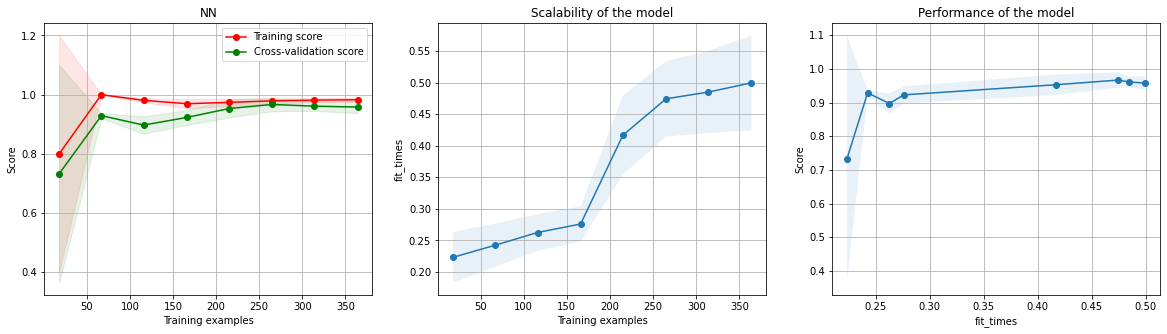

In [35]:
nn_b_kmeans = MLPClassifier( alpha=1.72, momentum = 0.989473, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=250, random_state =1, solver = 'sgd'
                          )

nn = nn_b_kmeans
X_train = X_b_cluster_kmeans
X_test = X_b_cluster_kmeans_test
y_train = y_b
y_test = y_b_test


nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "NN")

/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (245) reached and the optimization hasn't converged yet.
  warnings.warn(


The balanced accuracy of the Decision Tree is 0.976
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Train Score Mean 0.982904991997265
Test Score Mean 0.9611497636043385


<module 'matplotlib.pyplot' from '/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

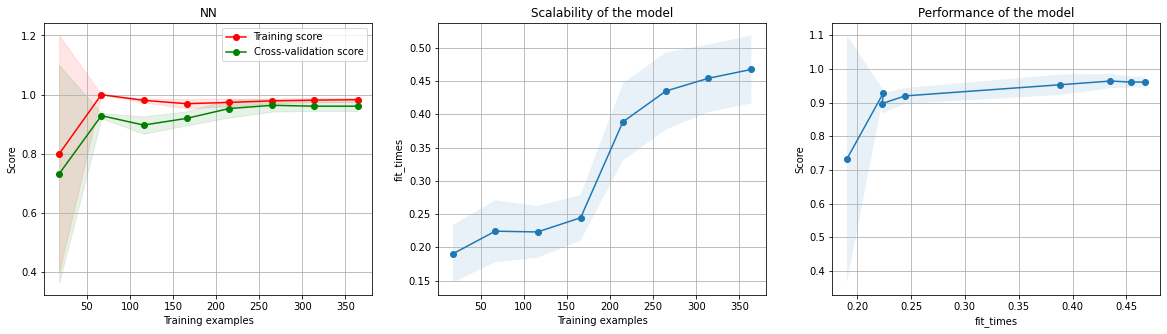

In [46]:
nn_b_kmeans = MLPClassifier( alpha=1.72, momentum = 0.989473, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=245, random_state =1, solver = 'sgd'
                          )

nn = nn_b_kmeans
X_train = X_b_cluster_kmeans
X_test = X_b_cluster_kmeans_test
y_train = y_b
y_test = y_b_test


nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "NN")

/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (235) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (235) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (235) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (235) reached and the optimization hasn't converged yet.
  war

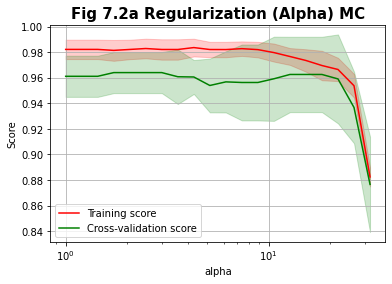

[(1.0, 0.9611497636043385),
 (1.1993539462092342, 0.9611497636043385),
 (1.4384498882876628, 0.9611497636043385),
 (1.7252105499420405, 0.9640443814243295),
 (2.0691380811147897, 0.9640443814243295),
 (2.481628922836826, 0.9640443814243295),
 (2.976351441631318, 0.9640443814243295),
 (3.5696988468260646, 0.9608029021022876),
 (4.281332398719393, 0.9606119860531626),
 (5.134832907437552, 0.9539697394109158),
 (6.158482110660264, 0.9567854744005639),
 (7.3861998220793605, 0.9563097368418589),
 (8.858667904100825, 0.9563097368418589),
 (10.624678308940409, 0.9592082875664965),
 (12.742749857031335, 0.9625813034395124),
 (15.283067326587688, 0.9625813034395124),
 (18.329807108324356, 0.9625813034395124),
 (21.983926488622892, 0.9590994806028508),
 (26.366508987303583, 0.9367681780585005),
 (31.622776601683793, 0.8766197375615091)]

In [40]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-0,1.5,20), title = "Fig 7.2a Regularization (Alpha) MC")


/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  war

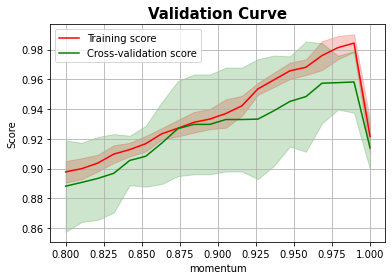

[(0.9894736842105263, 0.9582651482197232),
 (0.9789473684210527, 0.9578051645457265),
 (0.968421052631579, 0.9574172232995762),
 (0.9578947368421052, 0.9484230431552645),
 (0.9473684210526316, 0.9451692586020946),
 (0.9368421052631579, 0.9389035591274398),
 (0.9263157894736842, 0.9332635318391322),
 (0.9052631578947369, 0.9330090497737556),
 (0.9157894736842105, 0.9330090497737556),
 (0.8842105263157896, 0.9297398190045248),
 (0.8947368421052632, 0.9297398190045248),
 (0.8736842105263158, 0.9268493761140819),
 (0.8631578947368421, 0.9171477172958735),
 (1.0, 0.9139412558767397),
 (0.8526315789473684, 0.9082999108734402),
 (0.8421052631578948, 0.905495749860324),
 (0.8315789473684211, 0.8968360762006504),
 (0.8210526315789474, 0.8933745377391119),
 (0.8105263157894738, 0.8907317414901776),
 (0.8, 0.8881989508976856)]

In [30]:
plot_validation_curve(nn, X_train, y_train, param_name = "momentum", param_range = np.linspace(0.8,1,20))

## Breast Cancer EM

In [50]:
#Breast Cancer
n_clusters =2 
gmm_b = GaussianMixture(n_components = n_clusters, random_state = random_seed)
gmm_b.fit(X_b)

cluster_b_em = gmm_b.predict(X_b)
cluster_b_em_test = gmm_b.predict(X_b_test)
#cluster = np.array([cluster])

X_b_cluster_em= np.concatenate((X_b, cluster_b_em[:,None]), axis=1)
X_b_cluster_em_test= np.concatenate((X_b_test, cluster_b_em_test[:,None]), axis=1)

The balanced accuracy of the Decision Tree is 0.976
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (245) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Score Mean 0.982904991997265
Test Score Mean 0.9611497636043385


<module 'matplotlib.pyplot' from '/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

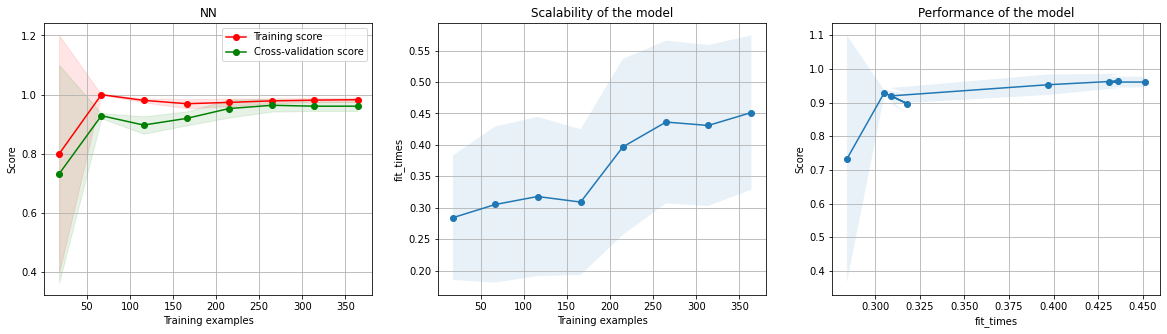

In [51]:

nn = = MLPClassifier( alpha=1.72, momentum = 0.989473, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=245, random_state =1, solver = 'sgd'
                          )
X_train = X_b_cluster_em
X_test = X_b_cluster_em_test
y_train = y_b
y_test = y_b_test


nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "NN")

# PCA

In [81]:
bc_pca_n = 5
pca_bc = PCA(n_components = bc_pca_n)
X_b_pca = pca_bc.fit_transform(X_b)
X_b_pca_test = pca_bc.transform(X_b_test)

The balanced accuracy of the Decision Tree is 0.964
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        73
           1       0.95      0.98      0.96        41

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Train Score Mean 0.9755745468235351
Test Score Mean 0.9577533577533577


<module 'matplotlib.pyplot' from '/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

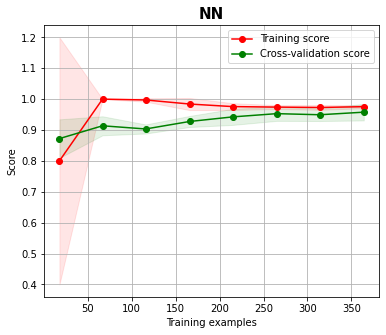

In [113]:

nn = MLPClassifier( alpha = 0.6, activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=300, random_state =1, solver = 'sgd'
                          , momentum = 0.978947)
X_train = X_b_pca
X_test = X_b_pca_test
y_train = y_b
y_test = y_b_test


nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "NN")

/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  war

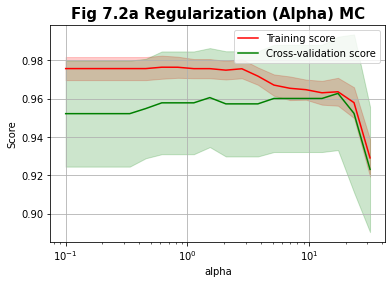

[(0.1, 0.9521160556800483),
 (0.13538761800225438, 0.9521160556800483),
 (0.18329807108324356, 0.9521160556800483),
 (0.24816289228368257, 0.9521160556800483),
 (0.33598182862837817, 0.9521160556800483),
 (0.45487779470037765, 0.9547719912937304),
 (0.6158482110660264, 0.9577533577533577),
 (0.8337822234717891, 0.9577533577533577),
 (1.1288378916846888, 0.9577533577533577),
 (1.5283067326587687, 0.960486277008016),
 (2.0691380811147893, 0.9572170462387855),
 (2.8013567611988672, 0.9572170462387855),
 (3.79269019073225, 0.9572170462387855),
 (5.134832907437552, 0.960030345471522),
 (6.951927961775605, 0.960030345471522),
 (9.412049672680666, 0.960030345471522),
 (12.742749857031335, 0.960030345471522),
 (17.25210549942041, 0.9626678273417404),
 (23.357214690901213, 0.9522446418931734),
 (31.622776601683793, 0.9230481276171387)]

In [86]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-1,1.5,20), title = "Fig 7.2a Regularization (Alpha) MC")


/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  war

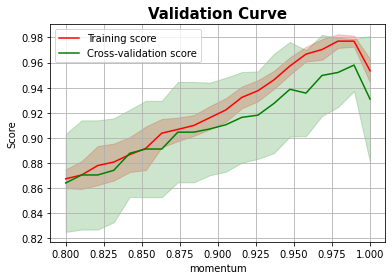

[(0.9894736842105263, 0.9579896028695509),
 (0.9789473684210527, 0.9521160556800483),
 (0.968421052631579, 0.9497260579200548),
 (0.9473684210526316, 0.9387309729715347),
 (0.9578947368421052, 0.9356554415377945),
 (1.0, 0.9308978312970965),
 (0.9368421052631579, 0.9274210764360017),
 (0.9263157894736842, 0.9181040253279059),
 (0.9157894736842105, 0.9163595413595413),
 (0.9052631578947369, 0.9104728906967712),
 (0.8947368421052632, 0.9071075060813867),
 (0.8736842105263158, 0.9045614130172954),
 (0.8842105263157896, 0.9045614130172954),
 (0.8526315789473684, 0.8911265343168328),
 (0.8631578947368421, 0.8911265343168328),
 (0.8421052631578948, 0.887753518443817),
 (0.8315789473684211, 0.8741456505271131),
 (0.8105263157894738, 0.8704590145824127),
 (0.8210526315789474, 0.8704590145824127),
 (0.8, 0.8640745720814975)]

In [102]:
plot_validation_curve(nn, X_train, y_train, param_name = "momentum", param_range = np.linspace(0.8,1,20))

# ICA

In [218]:
ica = ICA(random_state=7, n_components = 26)
X_b_ICA = ica.fit_transform(X_b)
X_b_ICA = ica.inverse_transform(X_b_ICA)
X_b_ICA_test = ica.transform(X_b_test)
X_b_ICA_test = ica.inverse_transform(X_b_ICA_test)
X_b_ICA_test

array([[-0.10233533,  0.69412152, -0.06217867, ...,  0.72464477,
         0.28548643,  0.48496436],
       [-0.77401266, -1.9576698 , -0.78688979, ..., -0.36842306,
         0.1862208 ,  0.05498841],
       [-1.69511095,  0.32866946, -1.58208312, ..., -0.5514152 ,
         0.67774403,  3.51619101],
       ...,
       [-0.73463562, -1.12082599, -0.71625755, ..., -0.68953513,
        -0.92001928, -0.16281782],
       [-0.5949245 ,  2.05134798, -0.62895202, ..., -0.90888577,
        -0.79993032, -0.98178116],
       [ 0.74499127,  0.53290676,  0.73693379, ...,  0.94926046,
         3.15385322,  0.10226009]])

/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


The balanced accuracy of the Decision Tree is 0.951
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        74
           1       0.93      0.97      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Train Score Mean 0.9664362147408921
Test Score Mean 0.9581932236052936


<module 'matplotlib.pyplot' from '/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

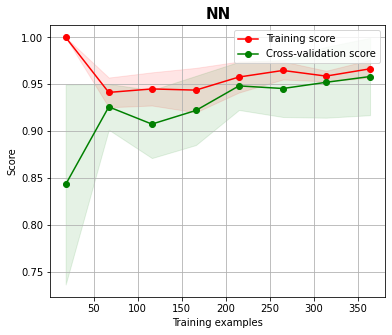

In [219]:

nn = MLPClassifier(  activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=300, random_state =1, solver = 'sgd'
                          )
X_train = X_b_ICA
X_test = X_b_ICA_test
y_train = y_b
y_test = y_b_test


nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "NN")

# RP

In [238]:
rp_b = random_projection.GaussianRandomProjection(random_state=2, n_components = 10)
X_b_rp = rp_b.fit_transform(X_b)
X_b_rp_test = rp_b.transform(X_b_test)

/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (275) reached and the optimization hasn't converged yet.
  warnings.warn(


The balanced accuracy of the Decision Tree is 0.952
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Train Score Mean 0.9442354266403831
Test Score Mean 0.939105869255123


<module 'matplotlib.pyplot' from '/Users/bhkash/miniconda3/envs/Asst3/lib/python3.9/site-packages/matplotlib/pyplot.py'>

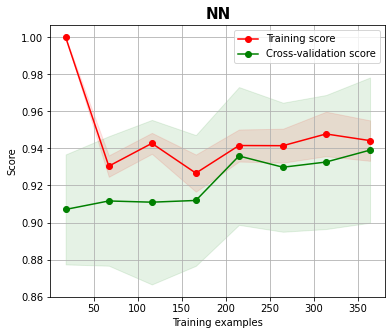

In [239]:

nn = MLPClassifier(  activation = 'tanh', hidden_layer_sizes = (5,5), max_iter=275, random_state =1, solver = 'sgd'
                          )
X_train = X_b_rp
X_test = X_b_rp_test
y_train = y_b
y_test = y_b_test


nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.f1_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "NN")

# Wine

In [22]:
def oneHot(labels):
    onehot = np.zeros((labels.size, labels.max()+1))
    onehot[np.arange(labels.size),labels] = 1
    return onehot

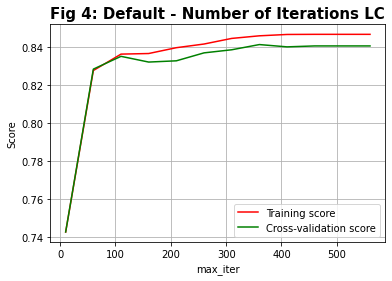

[(360, 0.841240006212764),
 (460, 0.8405213941606131),
 (510, 0.8405213941606131),
 (560, 0.8405213941606131),
 (410, 0.8400311980821819),
 (310, 0.8384942115246179),
 (260, 0.8368687792390219),
 (110, 0.8350411215095518),
 (210, 0.8326878217072414),
 (160, 0.8320339038638671),
 (60, 0.8283176117601043),
 (10, 0.7426468449098209)]

In [28]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 600, 50), title = "Fig 4: Default - Number of Iterations LC")


The balanced accuracy of the Neural Network is 0.849
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       520
           1       0.70      0.85      0.77       213

    accuracy                           0.85       733
   macro avg       0.82      0.85      0.83       733
weighted avg       0.86      0.85      0.85       733

Train Score Mean 0.8469739125157707
Test Score Mean 0.8407491230474434
Fit Time Mean 3.0324142456054686


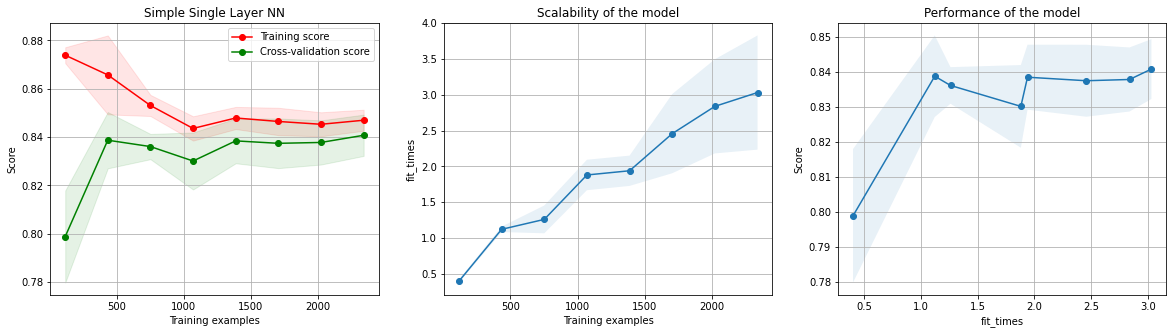

In [57]:

X_train = X_w
X_test = X_w_test
y_train = y_w
y_test = y_w_test


nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)


nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "balanced_accuracy")
nn_default = nn

# Wine KM

In [23]:
#Wine
n_clusters = 3
km_w = KMeans(n_clusters=n_clusters, random_state = random_seed)
km_w = km_w.fit(X_w)
cluster_w_kmeans = oneHot(km_w.predict(X_w))
cluster_w_kmeans_test = oneHot(km_w.predict(X_w_test))
#cluster = np.array([cluster])

print(cluster_w_kmeans, cluster_w_kmeans_test)

X_w_cluster_kmeans= np.concatenate((X_w, cluster_w_kmeans), axis=1)
X_w_cluster_kmeans_test= np.concatenate((X_w_test, cluster_w_kmeans_test), axis=1)
X_w_cluster_kmeans
# print(len(cluster_w_kmeans))
# print(oneHot(cluster_w_kmeans))
# print(len(cluster_w_kmeans_test))
# print(oneHot(cluster_w_kmeans_test))

[[0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]] [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]


array([[ 0.50745406, -0.39971329,  0.30897826, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.12392615, -0.45706141, -0.43752027, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66086522, -0.28501704,  0.30897826, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.20063173,  0.34581232,  0.17325126, ...,  1.        ,
         0.        ,  0.        ],
       [-0.79654084, -0.62910578,  0.44470527, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1061906 ,  0.63255294, -2.13410785, ...,  0.        ,
         1.        ,  0.        ]])

In [116]:
X_w_cluster_kmeans.shape

(2928, 16)

The balanced accuracy of the Neural Network is 0.838
              precision    recall  f1-score   support

           0       0.92      0.86      0.88       511
           1       0.71      0.82      0.76       222

    accuracy                           0.84       733
   macro avg       0.81      0.84      0.82       733
weighted avg       0.85      0.84      0.85       733

Train Score Mean 0.848875508473018
Test Score Mean 0.8384072616153023
Fit Time Mean 2.14035906791687


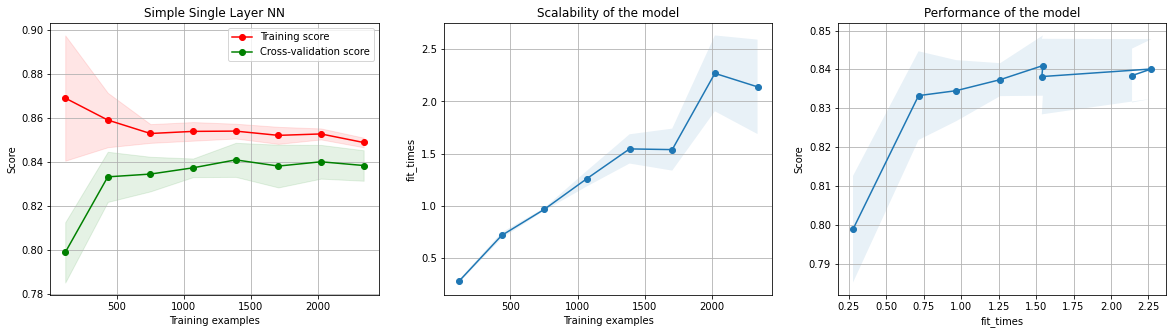

In [56]:
nn_w_kmeans = MLPClassifier( alpha = 0.12742, hidden_layer_sizes=(4), max_iter=350,activation = 'relu',solver='adam',random_state=1)

nn = nn_w_kmeans
X_train = X_w_cluster_kmeans
X_test = X_w_cluster_kmeans_test
y_train = y_w
y_test = y_w_test


#nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "balanced_accuracy")
nn_km = nn

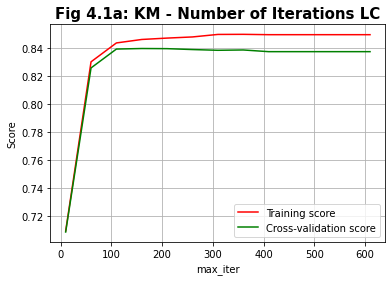

[(160, 0.8399391358323858),
 (210, 0.8398393733791231),
 (110, 0.8395497192338215),
 (260, 0.8391946631901057),
 (360, 0.8388974576937338),
 (310, 0.8386697288069035),
 (410, 0.8376893366500408),
 (460, 0.8376893366500408),
 (510, 0.8376893366500408),
 (560, 0.8376893366500408),
 (610, 0.8376893366500408),
 (60, 0.8260528054960327),
 (10, 0.7086436310387174)]

In [31]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 650, 50), title = "Fig 4.1a: KM - Number of Iterations LC")


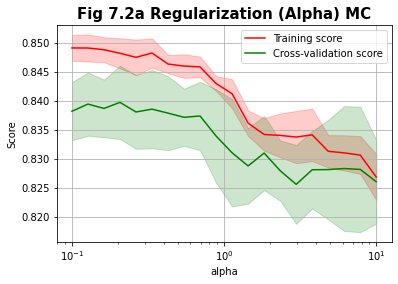

[(0.1, 0.8381778286149786),
 (0.12742749857031338, 0.8394200008765533),
 (0.16237767391887217, 0.8386687117802989),
 (0.20691380811147897, 0.8397178934598142),
 (0.26366508987303583, 0.838056018755954),
 (0.33598182862837817, 0.8385438236340027),
 (0.42813323987193935, 0.8378578886259558),
 (0.5455594781168519, 0.837137902400027),
 (0.6951927961775606, 0.8373646142602528),
 (0.8858667904100825, 0.8339015816937341),
 (1.1288378916846888, 0.8310070995298295),
 (1.438449888287663, 0.8287470756665231),
 (1.8329807108324356, 0.8309655447710844),
 (2.3357214690901213, 0.8279263099607272),
 (2.9763514416313175, 0.8255624011228242),
 (3.79269019073225, 0.8280828581245224),
 (4.832930238571752, 0.8281158923157997),
 (6.158482110660261, 0.828294696180134),
 (7.847599703514611, 0.8281405392167214),
 (10.0, 0.8260218325654225)]

In [32]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-1,1,20), scoring = "balanced_accuracy", title = "Fig 7.2a Regularization (Alpha) MC")


# NN + EM

In [35]:
#Wine
n_clusters = 5
gmm_w = GaussianMixture(n_components = n_clusters, random_state = random_seed)
gmm_w.fit(X_w)
cluster_w_em = oneHot(gmm_w.predict(X_w))
cluster_w_em_test = oneHot(gmm_w.predict(X_w_test))
#cluster = np.array([cluster])

print(cluster_w_em, cluster_w_em_test)

X_w_cluster_em= np.concatenate((X_w, cluster_w_em), axis=1)
X_w_cluster_em_test= np.concatenate((X_w_test, cluster_w_em_test), axis=1)
X_w_cluster_em

[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]] [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


array([[ 0.50745406, -0.39971329,  0.30897826, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12392615, -0.45706141, -0.43752027, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.66086522, -0.28501704,  0.30897826, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.20063173,  0.34581232,  0.17325126, ...,  0.        ,
         0.        ,  0.        ],
       [-0.79654084, -0.62910578,  0.44470527, ...,  0.        ,
         0.        ,  1.        ],
       [-0.1061906 ,  0.63255294, -2.13410785, ...,  1.        ,
         0.        ,  0.        ]])

In [36]:
X_w_cluster_em.shape

(2928, 18)

The balanced accuracy of the Neural Network is 0.823
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       520
           1       0.67      0.81      0.73       213

    accuracy                           0.83       733
   macro avg       0.79      0.82      0.80       733
weighted avg       0.84      0.83      0.83       733

Train Score Mean 0.8377285678168178
Test Score Mean 0.8269328697576821
Fit Time Mean 2.1586600303649903


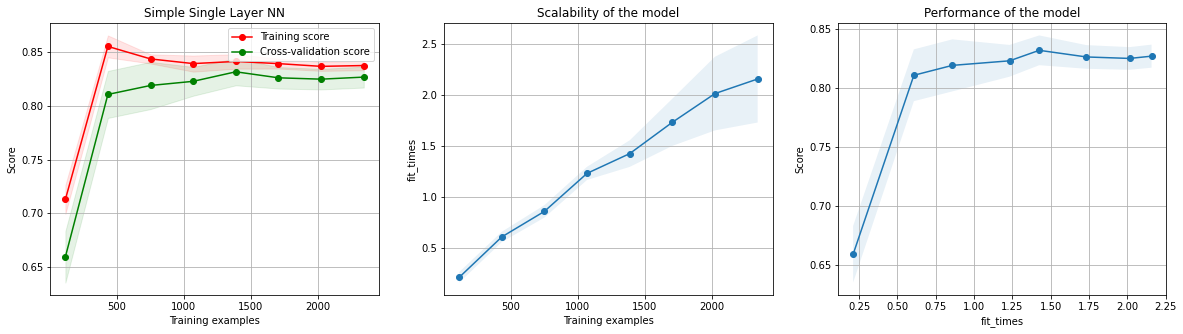

In [58]:
nn_w_em = MLPClassifier( alpha = 0.263665, hidden_layer_sizes=(4), max_iter=300,activation = 'relu',solver='adam',random_state=1)

nn = nn_w_em
X_train = X_w_cluster_em
X_test = X_w_cluster_em_test
y_train = y_w
y_test = y_w_test


#nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "balanced_accuracy")
nn_em = nn

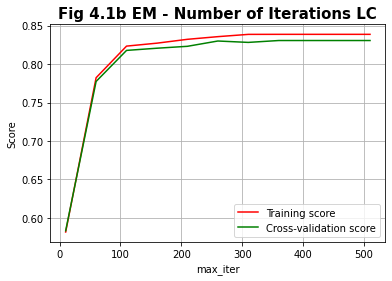

[(360, 0.8306099710956248),
 (410, 0.8306099710956248),
 (460, 0.8306099710956248),
 (510, 0.8306099710956248),
 (260, 0.8299768869688047),
 (310, 0.8281709467053808),
 (210, 0.823086247227427),
 (160, 0.8206059980181536),
 (110, 0.8177626509898083),
 (60, 0.777407391875936),
 (10, 0.5833217643476509)]

In [40]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 550, 50), title = "Fig 4.1b EM - Number of Iterations LC")


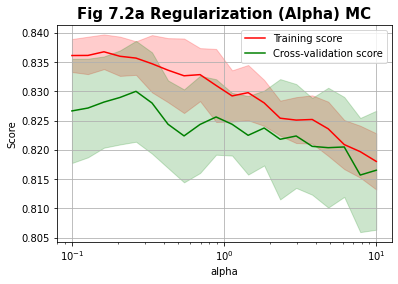

[(0.1, 0.8266346472347059),
 (0.12742749857031338, 0.8271248433131373),
 (0.16237767391887217, 0.8281406608616597),
 (0.20691380811147897, 0.8289290794630675),
 (0.26366508987303583, 0.8299768869688047),
 (0.33598182862837817, 0.827983755550691),
 (0.42813323987193935, 0.8243621135597101),
 (0.5455594781168519, 0.8223751387161397),
 (0.6951927961775606, 0.824332514802878),
 (0.8858667904100825, 0.8256022517680757),
 (1.1288378916846888, 0.8243576883061182),
 (1.438449888287663, 0.8224742412899712),
 (1.8329807108324356, 0.8237177877253238),
 (2.3357214690901213, 0.8217999323441214),
 (2.9763514416313175, 0.8223589179452052),
 (3.79269019073225, 0.8205924983873173),
 (4.832930238571752, 0.8203657865270916),
 (6.158482110660261, 0.8204903447336722),
 (7.847599703514611, 0.815700102404534),
 (10.0, 0.8165215551972189)]

In [44]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-1,1,20), scoring = "balanced_accuracy", title = "Fig 7.2a Regularization (Alpha) MC")


# PCA

In [41]:
wine_pca_n = 6
pca_wine = PCA(n_components = wine_pca_n)
X_w_pca = pca_wine.fit_transform(X_w)
X_w_pca_test = pca_wine.transform(X_w_test)
X_w_pca.shape

(2928, 6)

The balanced accuracy of the Decision Tree is 0.823
              precision    recall  f1-score   support

           0       0.92      0.83      0.87       525
           1       0.66      0.81      0.73       208

    accuracy                           0.83       733
   macro avg       0.79      0.82      0.80       733
weighted avg       0.85      0.83      0.83       733

Train Score Mean 0.8225346470071416
Test Score Mean 0.8147253491904707
Fit Time Mean 2.2524343490600587


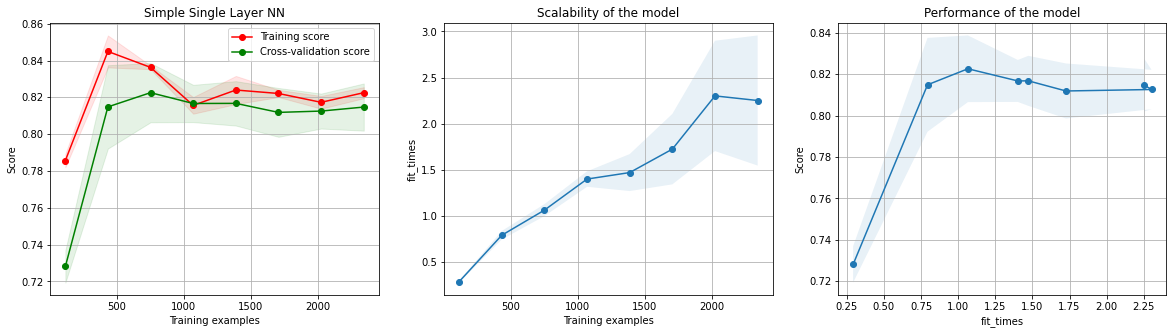

In [59]:

nn = MLPClassifier(alpha = 0.001,   hidden_layer_sizes=(4), max_iter=375,activation = 'relu',solver='adam',random_state=1)
X_train = X_w_pca
X_test = X_w_pca_test
y_train = y_w
y_test = y_w_test


#nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "balanced_accuracy")
nn_pca = nn

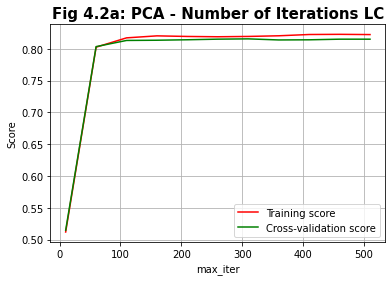

[(310, 0.8155485060966491),
 (260, 0.815094752436482),
 (460, 0.8150542147043416),
 (510, 0.8150542147043416),
 (210, 0.8141555850986488),
 (410, 0.814078604948244),
 (360, 0.8138501889745247),
 (160, 0.8134012177151229),
 (110, 0.8130585226307001),
 (60, 0.8033843932540725),
 (10, 0.5148364948103646)]

In [44]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 550, 50), title = "Fig 4.2a: PCA - Number of Iterations LC")


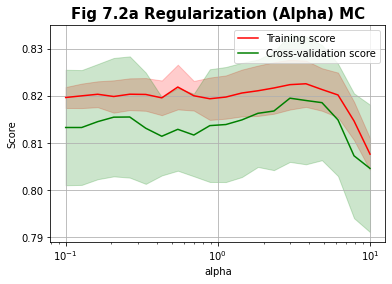

[(0.1, 0.8132956558344905),
 (0.12742749857031338, 0.8132949687476014),
 (0.16237767391887217, 0.8145357668353983),
 (0.20691380811147897, 0.8154834819481571),
 (0.26366508987303583, 0.8155185501926436),
 (0.33598182862837817, 0.8131370464100283),
 (0.42813323987193935, 0.8114387292879037),
 (0.5455594781168519, 0.8129093175231977),
 (0.6951927961775606, 0.8116994923660114),
 (0.8858667904100825, 0.8136950149845074),
 (1.1288378916846888, 0.8139234309582267),
 (1.438449888287663, 0.8149038231150895),
 (1.8329807108324356, 0.8163001523400769),
 (2.3357214690901213, 0.8167889742447304),
 (2.9763514416313175, 0.8195048130288708),
 (3.79269019073225, 0.8190139298635504),
 (4.832930238571752, 0.8185577850030008),
 (6.158482110660261, 0.814902778881027),
 (7.847599703514611, 0.8073017177152509),
 (10.0, 0.8046253996366464)]

In [52]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-1,1,20), scoring = "balanced_accuracy", title = "Fig 7.2a Regularization (Alpha) MC")


# ICA

In [45]:
#Without removing low kurtoric components
ica = ICA(random_state=2, n_components = 8)
X_w_ICA = ica.fit_transform(X_w)
X_w_ICA_test = ica.transform(X_w_test)
X_w_ICA.shape

(2928, 8)

The balanced accuracy of the Neural Network is 0.813
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       533
           1       0.63      0.81      0.71       200

    accuracy                           0.82       733
   macro avg       0.77      0.81      0.79       733
weighted avg       0.84      0.82      0.82       733

Train Score Mean 0.8447480785653289
Test Score Mean 0.8422169715002479
Fit Time Mean 4.2007781028747555


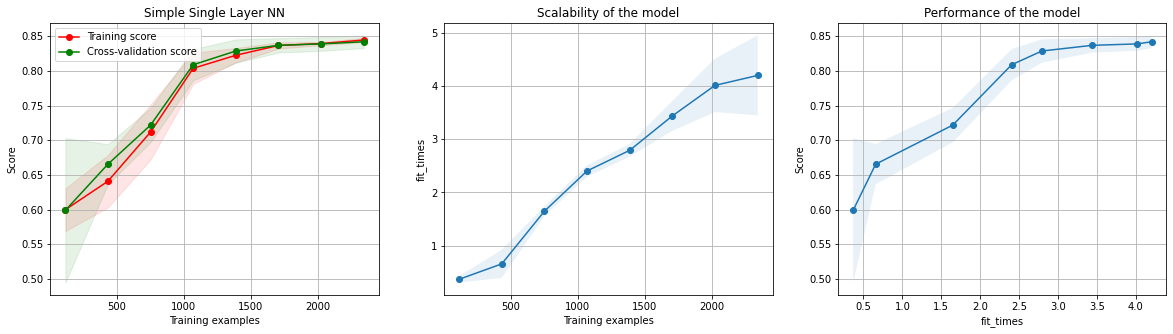

In [60]:
nn = MLPClassifier(  hidden_layer_sizes=(4), max_iter=600 ,activation = 'relu',solver='adam',random_state=1)
X_train = X_w_ICA
X_test = X_w_ICA_test
y_train = y_w
y_test = y_w_test


#nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "accuracy")
nn_ica_full = nn

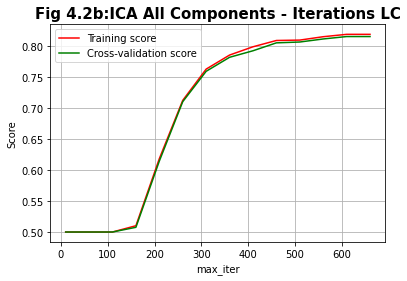

[(610, 0.8149392485067493),
 (660, 0.8149392485067493),
 (560, 0.8110486528099085),
 (510, 0.8061490832259773),
 (460, 0.8047813357312172),
 (410, 0.7920213638873873),
 (360, 0.7815097898446665),
 (310, 0.7589467167962106),
 (260, 0.7099546374786635),
 (210, 0.6142435884097569),
 (160, 0.5075741835490422),
 (10, 0.5),
 (60, 0.5),
 (110, 0.5)]

In [51]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 700, 50), title = "Fig 4.2b:ICA All Components - Iterations LC")


In [61]:
#Remove low Kurtotic components
ica_w = ICA(random_state=2, n_components = 8)
selected_IC_w = [3,1,0,7]
X_w_ICA = ica_w.fit_transform(X_w)
df_w_ICA = pd.DataFrame(X_w_ICA)
X_w_ICA_original = X_w_ICA
X_w_ICA = df_w_ICA[selected_IC_w].to_numpy()

X_w_ICA_test = ica_w.transform(X_w_test)
df_w_ICA_test = pd.DataFrame(X_w_ICA_test)
X_w_ICA_test_original = X_w_ICA_test
X_w_ICA_test = df_w_ICA_test[selected_IC_w].to_numpy()

The balanced accuracy of the Neural Network is 0.651
              precision    recall  f1-score   support

           0       1.00      0.65      0.79       733
           1       0.00      0.00      0.00         0

    accuracy                           0.65       733
   macro avg       0.50      0.33      0.39       733
weighted avg       1.00      0.65      0.79       733

Train Score Mean 0.6513236549957301
Test Score Mean 0.6512978034479742
Fit Time Mean 0.9709537506103516


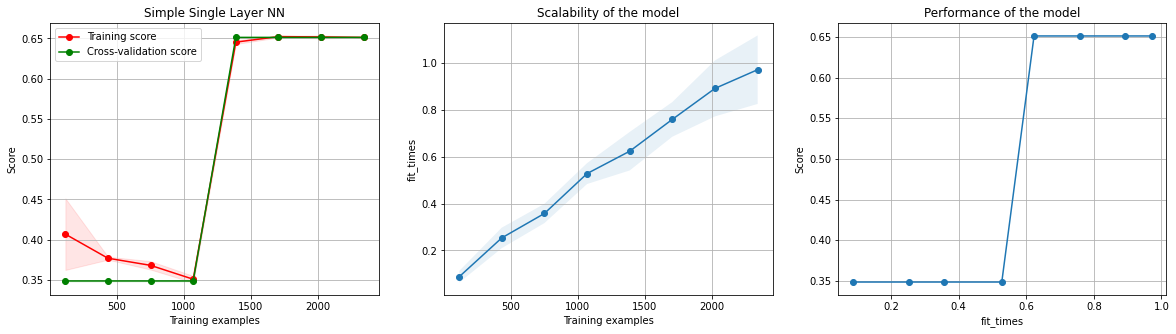

In [62]:
nn = MLPClassifier(  hidden_layer_sizes=(4), max_iter=150 ,activation = 'relu',solver='adam',random_state=1)
X_train = X_w_ICA
X_test = X_w_ICA_test
y_train = y_w
y_test = y_w_test


#nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Neural Network is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "accuracy")
nn_ica_high_kurtosis = nn

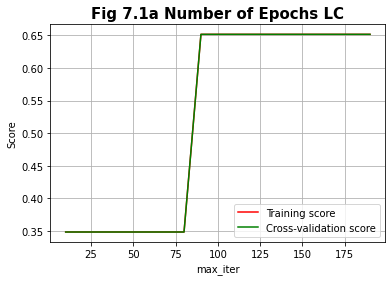

[(90, 0.6512978034479742),
 (100, 0.6512978034479742),
 (110, 0.6512978034479742),
 (120, 0.6512978034479742),
 (130, 0.6512978034479742),
 (140, 0.6512978034479742),
 (150, 0.6512978034479742),
 (160, 0.6512978034479742),
 (170, 0.6512978034479742),
 (180, 0.6512978034479742),
 (190, 0.6512978034479742),
 (10, 0.34870219655202594),
 (20, 0.34870219655202594),
 (30, 0.34870219655202594),
 (40, 0.34870219655202594),
 (50, 0.34870219655202594),
 (60, 0.34870219655202594),
 (70, 0.34870219655202594),
 (80, 0.34870219655202594)]

In [97]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 200, 10), title = "Fig 7.1a Number of Epochs LC", scoring = "accuracy")


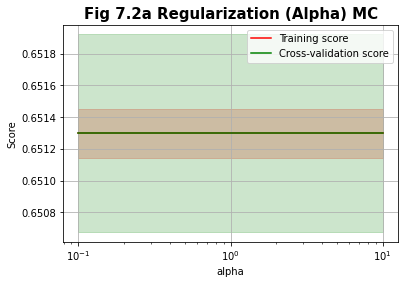

[(0.1, 0.6512978034479742),
 (0.12742749857031338, 0.6512978034479742),
 (0.16237767391887217, 0.6512978034479742),
 (0.20691380811147897, 0.6512978034479742),
 (0.26366508987303583, 0.6512978034479742),
 (0.33598182862837817, 0.6512978034479742),
 (0.42813323987193935, 0.6512978034479742),
 (0.5455594781168519, 0.6512978034479742),
 (0.6951927961775606, 0.6512978034479742),
 (0.8858667904100825, 0.6512978034479742),
 (1.1288378916846888, 0.6512978034479742),
 (1.438449888287663, 0.6512978034479742),
 (1.8329807108324356, 0.6512978034479742),
 (2.3357214690901213, 0.6512978034479742),
 (2.9763514416313175, 0.6512978034479742),
 (3.79269019073225, 0.6512978034479742),
 (4.832930238571752, 0.6512978034479742),
 (6.158482110660261, 0.6512978034479742),
 (7.847599703514611, 0.6512978034479742),
 (10.0, 0.6512978034479742)]

In [99]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-1,1,20), scoring = "accuracy", title = "Fig 7.2a Regularization (Alpha) MC")


# RP

In [246]:
rp_w = random_projection.GaussianRandomProjection(random_state=2, n_components = 10)
X_w_rp = rp_w.fit_transform(X_w)
X_w_rp_test = rp_w.transform(X_w_test)

The balanced accuracy of the Decision Tree is 0.831
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       524
           1       0.67      0.82      0.74       209

    accuracy                           0.83       733
   macro avg       0.80      0.83      0.81       733
weighted avg       0.85      0.83      0.84       733

Train Score Mean 0.84143506187017
Test Score Mean 0.828197089425019
Fit Time Mean 3.2625216007232667


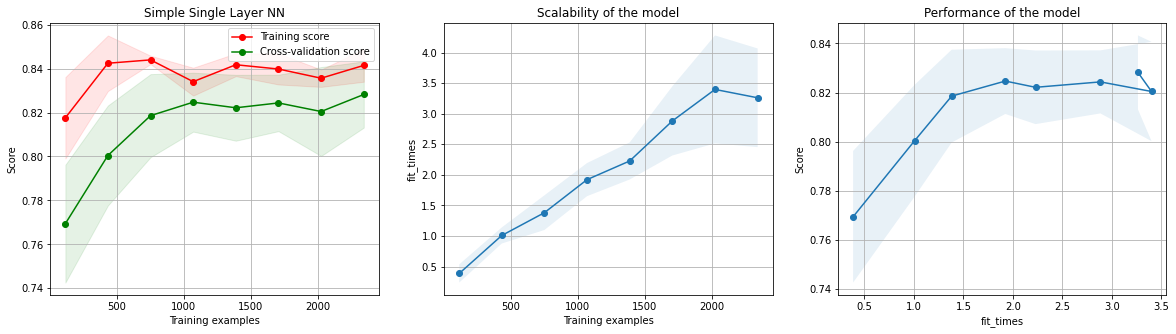

In [63]:
nn = MLPClassifier( alpha = 0.35,
                hidden_layer_sizes=(4), max_iter=450,activation = 'relu',solver='adam',random_state=1)
X_train = X_w_rp
X_test = X_w_rp_test
y_train = y_w
y_test = y_w_test


#nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "balanced_accuracy")
nn_rp = nn

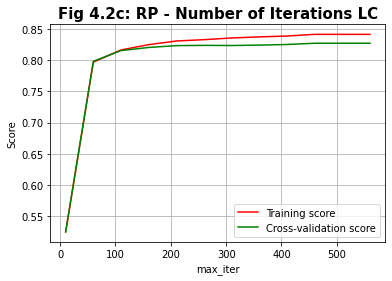

[(510, 0.8272146360074893),
 (560, 0.8272146360074893),
 (460, 0.8271812718764966),
 (410, 0.8252218617365491),
 (360, 0.8242074183618048),
 (260, 0.8237901071199019),
 (310, 0.8235575958323065),
 (210, 0.8233744999914927),
 (160, 0.82043365346062),
 (110, 0.81541260395738),
 (60, 0.7982685331534802),
 (10, 0.5249023909775969)]

In [53]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 600, 50), title = "Fig 4.2c: RP - Number of Iterations LC")


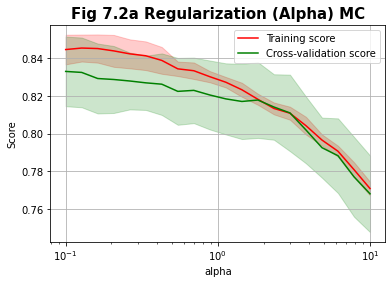

[(0.1, 0.8329762233237037),
 (0.12742749857031338, 0.832449584827008),
 (0.16237767391887217, 0.8292142811473197),
 (0.20691380811147897, 0.8286941291648826),
 (0.26366508987303583, 0.8279002410758206),
 (0.33598182862837817, 0.8269208659455625),
 (0.42813323987193935, 0.8262063492072882),
 (0.5455594781168519, 0.8223971861219017),
 (0.6951927961775606, 0.8229214334182146),
 (0.8858667904100825, 0.8204690788522798),
 (1.1288378916846888, 0.8184040796242421),
 (1.438449888287663, 0.8170387233298648),
 (1.8329807108324356, 0.8177913865998973),
 (2.3357214690901213, 0.814100625146548),
 (2.9763514416313175, 0.8109667880336158),
 (3.79269019073225, 0.8019162168219098),
 (4.832930238571752, 0.7925088854529945),
 (6.158482110660261, 0.7882459687074409),
 (7.847599703514611, 0.7770498132277022),
 (10.0, 0.7680349973473714)]

In [105]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-1,1,20), scoring = "balanced_accuracy", title = "Fig 7.2a Regularization (Alpha) MC")


In [22]:
X_w_FI.shape

(2928, 8)

The balanced accuracy of the Decision Tree is 0.828
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       521
           1       0.68      0.82      0.74       212

    accuracy                           0.83       733
   macro avg       0.80      0.83      0.81       733
weighted avg       0.85      0.83      0.84       733

Train Score Mean 0.8317824901727107
Test Score Mean 0.8298665426874072
Fit Time Mean 1.8355045795440674


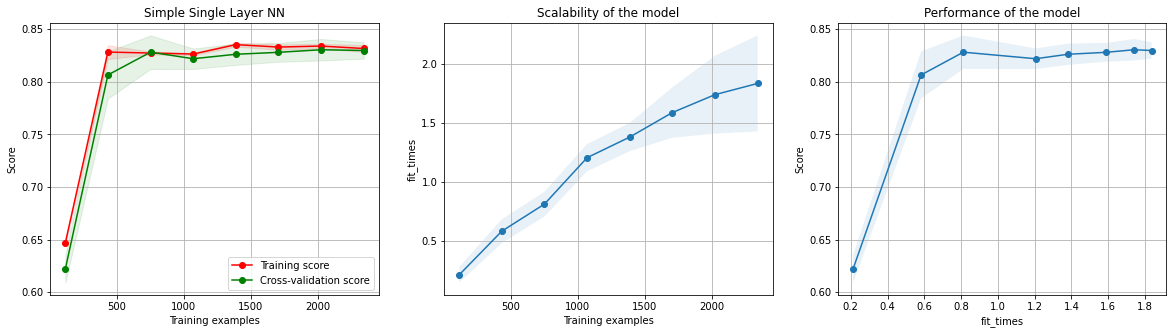

In [64]:
nn = MLPClassifier( alpha =0.88, hidden_layer_sizes=(4), max_iter=300,activation = 'relu',solver='adam',random_state=2)
X_train = X_w_FI
X_test = X_w_FI_test
y_train = y_w
y_test = y_w_test


#nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

nn.fit(X_train, y_train)
prediction=nn.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(nn, X_train, y_train, "Simple Single Layer NN", scoring = "balanced_accuracy")
nn_fi = nn

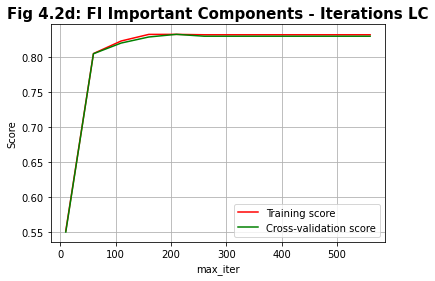

[(210, 0.8327719638266201),
 (260, 0.8300942715742374),
 (310, 0.8300942715742374),
 (360, 0.8300942715742374),
 (410, 0.8300942715742374),
 (460, 0.8300942715742374),
 (510, 0.8300942715742374),
 (560, 0.8300942715742374),
 (160, 0.8289814399200086),
 (110, 0.8203147680090057),
 (60, 0.8050738120588067),
 (10, 0.5506521429510592)]

In [55]:
plot_validation_curve_nn(nn, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 600, 50), title = "Fig 4.2d: FI Important Components - Iterations LC")


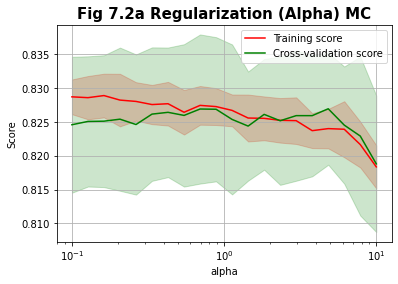

[(0.1, 0.8245792400156564),
 (0.12742749857031338, 0.8250694360940878),
 (0.16237767391887217, 0.8251058785123522),
 (0.20691380811147897, 0.8254030840087241),
 (0.26366508987303583, 0.8246119170597602),
 (0.33598182862837817, 0.8261512948177068),
 (0.42813323987193935, 0.8264154661228014),
 (0.5455594781168519, 0.8259593212622518),
 (0.6951927961775606, 0.8269042880274547),
 (0.8858667904100825, 0.8268685326960794),
 (1.1288378916846888, 0.8253645803297924),
 (1.438449888287663, 0.8243794057721647),
 (1.8329807108324356, 0.8261124611990599),
 (2.3357214690901213, 0.8251691985473505),
 (2.9763514416313175, 0.8259242530177655),
 (3.79269019073225, 0.8259249401046544),
 (4.832930238571752, 0.8269400705662878),
 (6.158482110660261, 0.8245255325923955),
 (7.847599703514611, 0.8229055697944538),
 (10.0, 0.8187951058988194)]

In [19]:
plot_validation_curve_log(nn, X_train, y_train, param_name = "alpha", param_range = np.logspace(-1,1,20), scoring = "balanced_accuracy", title = "Fig 7.2a Regularization (Alpha) MC")


In [65]:

estimators = [(nn_default, "Decision Tree"),
 (nn_km, "km"),
(nn_em, "em"),
(nn_pca, "pca"),
(nn_ica_full, "ICA_full"),
(nn_ica_high_kurtosis, "ICA_kurtosis"),
            (nn_rp, "RP"),
(nn_fi, "fi") ]

In [67]:

import time

test_times = []
for estimator, name in estimators:
    start_time1 = time.time()
    estimator.fit(X_w, y_w)
    end_time1 = time.time()
    start_time2 = time.time()
    estimator.predict(X_w_test)
    end_time2 = time.time()
    test_times.append((name, (end_time1-start_time1),end_time2-start_time2))
    
test_times

[('Decision Tree', 1.2446980476379395, 0.0001468658447265625),
 ('km', 1.1742467880249023, 0.00013589859008789062),
 ('em', 1.01751708984375, 0.00013184547424316406),
 ('pca', 1.228930950164795, 0.00013685226440429688),
 ('ICA_full', 1.1565308570861816, 0.00013709068298339844),
 ('ICA_kurtosis', 0.503525972366333, 0.00013494491577148438),
 ('RP', 1.2031021118164062, 0.00013184547424316406),
 ('fi', 1.0590059757232666, 0.00013303756713867188)]

In [14]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "f1", random_state =1):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, ax = plt.subplots( figsize=(6, 5))

    ax.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True, random_state = random_state, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print("Train Score Mean " + str(train_scores_mean[-1]))
    print("Test Score Mean " + str(test_scores_mean[-1]))

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

    return plt


In [15]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "f1", random_state =1):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True, random_state = random_state, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print("Train Score Mean " + str(train_scores_mean[-1]))
    print("Test Score Mean " + str(test_scores_mean[-1]))
    print("Fit Time Mean " + str(fit_times_mean[-1]))

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

def plot_validation_curve_log(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "f1", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = list(zip(param_range, test_scores_mean))
    return array

# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

def plot_validation_curve(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "f1", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = sorted(zip(param_range, test_scores_mean), key = lambda x:x[1], reverse = True)
    return array